# Exploring NFL data through visualization

Today, we'll go with our first option, download data from http://nflsavant.com as csv using wget. We can then load this local file using pandas read_csv. read_csv can also read the csv data directly from the URL, but this way we don't have to download the file each time we load our data frame. Something I'm sure the owner of the website will appreciate.

In [1]:
!wget http://nflsavant.com/pbp_data.php?year=2015 -O pbp-2015.csv

--2015-12-27 12:45:29--  http://nflsavant.com/pbp_data.php?year=2015
Resolving nflsavant.com... 104.131.173.80
Connecting to nflsavant.com|104.131.173.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/download]
Saving to: 'pbp-2015.csv'

pbp-2015.csv            [            <=>       ]   8.84M   697KB/s   in 13s    

2015-12-27 12:45:46 (695 KB/s) - 'pbp-2015.csv' saved [9273713]



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("talk")
plt.figure(figsize=(10, 8))

In [2]:
df = pd.read_csv('pbp-2015.csv')

In [3]:
# What do we have?
df.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')

In [4]:
def event_to_datetime(row):
    """Calculate a datetime from date, quarter, minute and second of an event."""
    mins = 15 * (row['Quarter'] - 1) + row['Minute']
    hours, mins = divmod(mins, 60)
    return "{} {}:{:02}:{:02}".format(row['GameDate'], hours, mins, row['Second'])

In [5]:
df['datetime'] = pd.to_datetime(df.apply(event_to_datetime, axis=1))

## Local team

Happens to be the Carolina Panthers. So let's look at their offence.

In [6]:
car = df[(df.OffenseTeam=='CAR')]

Pandas plot does a decent job, but doesn't know about categoricals. We can't use the game date string for X axis. Here we use the datetime we calculated from quarter, mins etc. But now it thinks it's a time series. Which it looks like one. Consider it instead a form of parallel plot, ignoring the slope graph between each date, since it doesn't mean anything here (pandas also has an actual parallel plot).

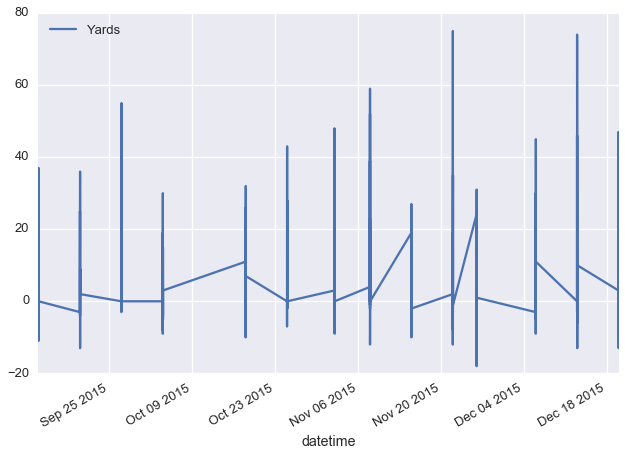

In [7]:
ax = car.plot(x='datetime', y='Yards')

Not bad, but not completely helpful. Sure, pandas also has *bar* plots. But I think something else could be better visually. Let's see what **Seaborn** has to offer. How about a *strip* plot? It is a scatter plot for categorical data. We'll add jitter on the x axis to better see the data

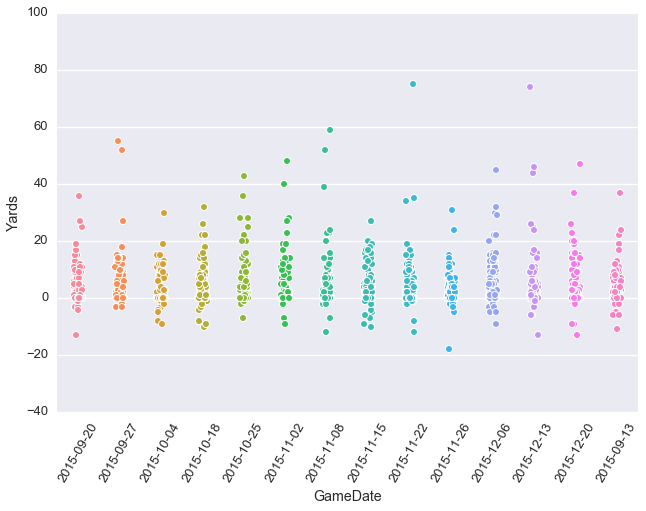

In [8]:
g = sns.stripplot(x='GameDate', y='Yards', data=car, jitter=True)
for item in g.get_xticklabels(): item.set_rotation(60)

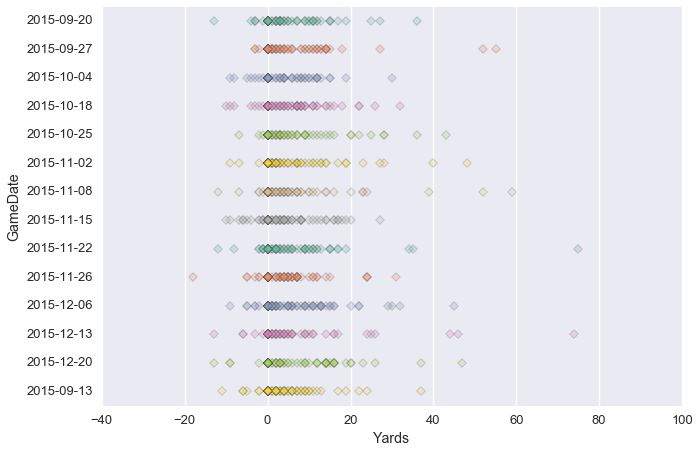

In [9]:
# We can also alter the look of the strip plot significantly
g = sns.stripplot(x='Yards', y='GameDate', data=car,
                  palette="Set2", size=6, marker="D", edgecolor="gray", alpha=.25)

## Dare to compare

How about comparing two teams? Say, Carolina and Atlanta. Let's see how they do in yards (loss and gains) per quarters, for this season up to 9/13.

In [10]:
car_atl = df[(df.OffenseTeam=='CAR')|(df.OffenseTeam=='ATL')]

Colors can really improve readability. Atlanta Falcons primary color is red and Carolina Panthers primary color is light blue. Using those (context manager with color_palette):

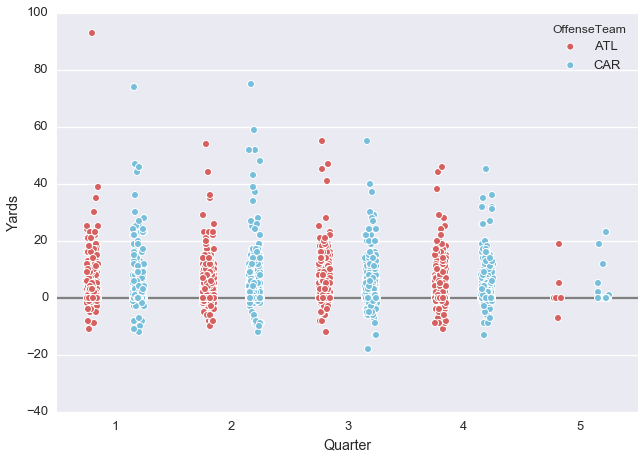

In [11]:
with sns.color_palette([sns.color_palette("muted")[2],sns.color_palette("muted")[5]]):
    g = sns.stripplot(x='Quarter', y='Yards', data=car_atl, hue='OffenseTeam', jitter=True)
    g.hlines(0,-1,6, color='grey')

## Distribution

We can also look at the distribution using plot types that are specifically designed for this. One pandas dataframe method is boxplot. Does the job, although we can make something prettier than this.

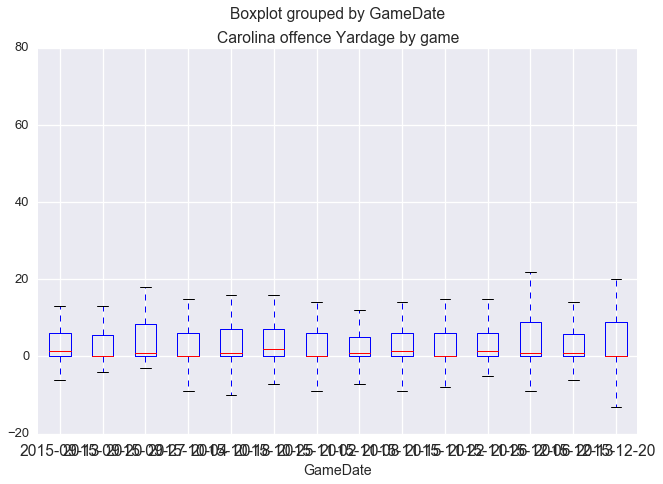

In [12]:
ax = car.boxplot(column='Yards', by='GameDate')
ax.set_title("Carolina offence Yardage by game")

Let's have a look at the same thing using Seaborn. We'll fix the x axis tick labels too, rotating them.

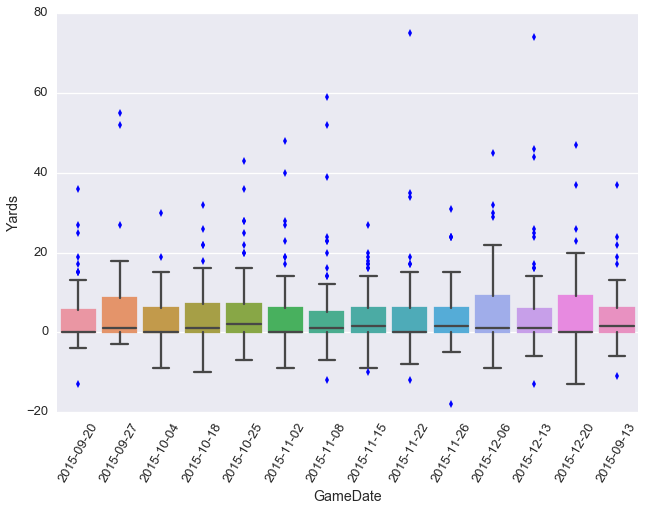

In [13]:
g = sns.boxplot(data=car, y='Yards', x='GameDate')
for item in g.get_xticklabels(): item.set_rotation(60)

Finally, let's look at one more way to look at the distribution of data using Seaborn's violin plot.

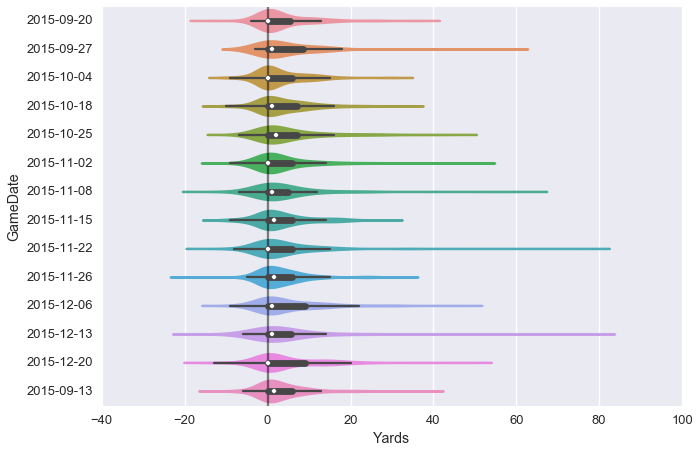

In [14]:
g = sns.violinplot(data=car, x='Yards', y='GameDate', orient='h')
g.vlines(0,-1,15, alpha=0.5)

## Conclusion

We've barely touched on strip plots, box plots and violin plots. It's your turn to go on and explore. And as for the data, we've looked at every single events, play and non play (false starts etc), penalties touchdowns etc all on an equal footing. In order to gain better insight on the data, we'd have to look at these things individually, assign weighs etc.

If I get enough demand, I'll cover this subject in more detail in the future.